# Slate Star Codex Reading List

Let's look at the favorite blogs and blog posts of SSC readers. I'll break down the results by personality and political opinions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%pylab inline

from warnings import filterwarnings
filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel('ssc2018public_original.xlsx')
data = data[[i for i in data.columns if 'Unnamed' not in i]] # fix import bug

In [3]:
from string import punctuation

# Clean up names
for i in punctuation:
    data['Favoriteblog'] = data['Favoriteblog'].str.replace(i, '')
    data['Favoritepost'] = data['Favoritepost'].str.replace(i, '')
    
data['Favoriteblog'] = data['Favoriteblog'].str.lower()
data['Favoritepost'] = data['Favoritepost'].str.lower()

def fix_title(str1, str2, col):
    data[col] = np.where(data[col] == str1, str2, data[col])

def title_contains(to_replace, replacement, col):
    data[col] = np.where(data[col].str.contains(to_replace), replacement, data[col])

# Fill in blanks
data['Favoriteblog'].fillna('None', inplace=True)

# Combine responses
fix_title('blogfefede', 'blog.fefe.de', 'Favoriteblog')
title_contains('instapundit', 'instapundit', 'Favoriteblog')
title_contains('shtetl', 'shtetl optimized', 'Favoriteblog')
title_contains('aaronson', 'shtetl optimized', 'Favoriteblog')
title_contains('marginal', 'marginal revolution', 'Favoriteblog')
title_contains('psychiatrist', 'the last psychiatrist', 'Favoriteblog')
title_contains('caring', 'the unit of caring', 'Favoriteblog')
title_contains('wrong', 'less wrong', 'Favoriteblog')
title_contains('wait', 'wait but why', 'Favoriteblog')
title_contains('gelman', 'andrew gelman', 'Favoriteblog')
title_contains('Heartiste', 'chateau heartiste', 'Favoriteblog')
title_contains('zvi', 'zvi', 'Favoriteblog')
title_contains('foxnews', 'fox news', 'Favoriteblog')
title_contains('wdtprs', 'wdtprs', 'Favoriteblog')
title_contains('fr z', 'wdtprs', 'Favoriteblog')
title_contains('mustache', 'mr money mustache', 'Favoriteblog')
title_contains('hours', '80000 hours', 'Favoriteblog')
title_contains('kevin', 'kevin md', 'Favoriteblog')
title_contains('caplan', 'bryan caplan', 'Favoriteblog')
title_contains('econlog', 'bryan caplan', 'Favoriteblog')
title_contains('steve', 'steve sailer', 'Favoriteblog')
title_contains('thingofthings', 'thing of things', 'Favoriteblog')

In [4]:
blog_dummies = pd.get_dummies(data['Favoriteblog'], prefix='')
blog_dummies.columns = [i.replace('_', '') for i in blog_dummies.columns]
del blog_dummies['none']
del blog_dummies['None']

blog_dummies = blog_dummies[[i for i in blog_dummies.columns if blog_dummies[i].sum() >= 10]]

# Top blogs overall

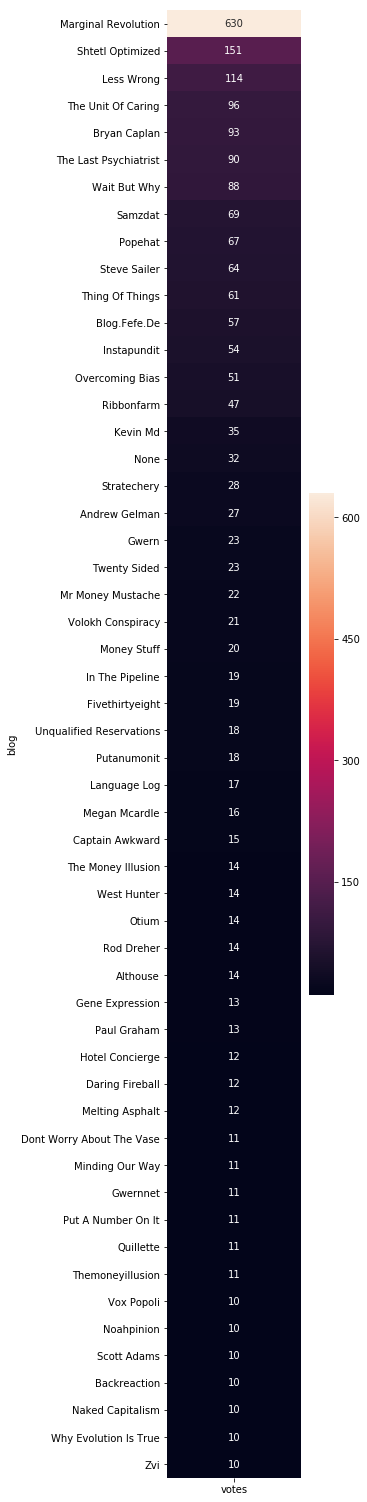

In [5]:
top_blogs = []

for blog, votes in zip(data['Favoriteblog'].value_counts().index[1:],
                        data['Favoriteblog'].value_counts()[1:]):
    if votes < 10:
        break
    top_blogs.append([blog.title(), votes])
    
top_blogs = pd.DataFrame(top_blogs, columns=['blog', 'votes'])
top_blogs = top_blogs.set_index('blog')

plt.figure(figsize=(3,len(top_blogs)//2))
sns.heatmap(top_blogs, annot=True, fmt='g')

In [6]:
from scipy.stats import pearsonr

blogs = []

for i in blog_dummies.columns:
    corr = pearsonr(data['PoliticalSpectrum'].fillna(data['PoliticalSpectrum'].median()), blog_dummies[i])
    blogs.append([i, corr[0], corr[1]])

blogs = pd.DataFrame(blogs, columns=['blog', 'corr', 'pvalue'])

# Blogs Liberals Like

Because of all the missing data, the correlations we'll see from this point forward are quite small.

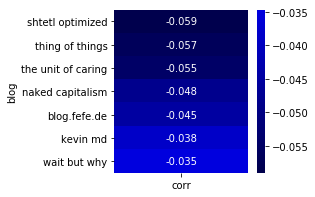

In [7]:
liberals = blogs[(blogs['pvalue'] < .01)  & (blogs['corr'] < 0)].sort_values('corr').head(20)[['blog', 'corr']]
liberals = liberals.set_index('blog')

def corrmap(df, reverse=False):   
    plt.figure(figsize=(3,len(df)//2))
    if reverse == False:
        return sns.heatmap(df, annot=True, fmt='.2g', center=0, cmap='seismic')
    else:
        return sns.heatmap(df, annot=True, fmt='.2g', center=0, cmap='seismic_r')
    
corrmap(liberals)

# Blogs Conservatives Like

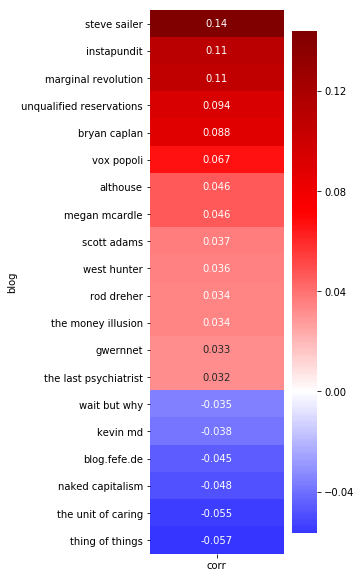

In [8]:
conservatives = blogs[blogs.pvalue < .01].sort_values('corr', ascending=False).head(20)[['blog', 'corr']]
conservatives = conservatives.set_index('blog')

corrmap(conservatives)

# Blogs That Smart People Like (and Don't Like)

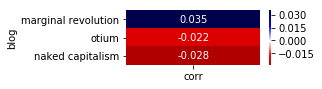

In [9]:
data['IQ'] = pd.to_numeric(data['IQ'], errors='coerce')

blogs = []

for i in blog_dummies.columns:
    corr = pearsonr(data['IQ'].fillna(data['IQ'].median()), blog_dummies[i])
    blogs.append([i, corr[0], corr[1]])

blogs = pd.DataFrame(blogs, columns=['blog', 'corr', 'pvalue'])

blogs = blogs[blogs.pvalue < .10].sort_values('corr', ascending=False).head(20)[['blog', 'corr']]
blogs = blogs.set_index('blog')

corrmap(blogs, reverse=True)

# Blogs Conscientious People Like

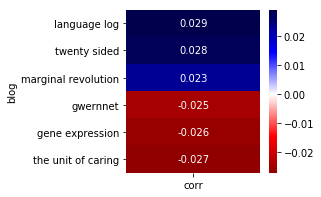

In [10]:
data['BigFiveC'] = pd.to_numeric(data['BigFiveC'], errors='coerce')

blogs = []

for i in blog_dummies.columns:
    corr = pearsonr(data['BigFiveC'].fillna(data['BigFiveC'].median()), blog_dummies[i])
    blogs.append([i, corr[0], corr[1]])

blogs = pd.DataFrame(blogs, columns=['blog', 'corr', 'pvalue'])

consc = blogs[blogs.pvalue < .05].sort_values('corr', ascending=False).head(20)[['blog', 'corr']]
consc = consc.set_index('blog')

corrmap(consc, reverse=True)

# Blogs Agreeable People Like

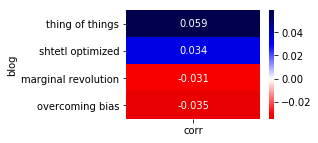

In [11]:
data['BigFiveA'] = pd.to_numeric(data['BigFiveA'], errors='coerce')

blogs = []

for i in blog_dummies.columns:
    corr = pearsonr(data['BigFiveA'].fillna(data['BigFiveA'].median()), blog_dummies[i])
    blogs.append([i, corr[0], corr[1]])

blogs = pd.DataFrame(blogs, columns=['blog', 'corr', 'pvalue'])

agree = blogs[blogs.pvalue < .01].sort_values('corr', ascending=False).head(20)[['blog', 'corr']]
agree = agree.set_index('blog')

corrmap(agree, reverse=True)

# Top SSC Posts

In [12]:
data['Favoritepost'] = data['Favoritepost'].str.lower()
data['Favoritepost'] = data['Favoritepost'].fillna('none')

title_contains('moloc', 'meditations on moloch', 'Favoritepost')
title_contains('outgroup', 'i can tolerate anything except the outgroup', 'Favoritepost')
title_contains('toxo', 'toxoplasma of rage', 'Favoritepost')
title_contains('rabbit', 'and i show you how deep the rabbit hole goes', 'Favoritepost')
title_contains('brick', 'all in all another brick in the motte', 'Favoritepost')
title_contains('whyaretransgender', 'why are transgender people immune to optical illusions', 'Favoritepost')
title_contains('ssris', 'ssris much more than you wanted to know', 'Favoritepost')
title_contains('cactus', 'universal love, said the cactus person', 'Favoritepost')
title_contains('cost disease', 'considerations on cost disease', 'Favoritepost')
title_contains('thingsthatsome', 'things that sometimes help if you have depression', 'Favoritepost')

post_dummies = pd.get_dummies(data['Favoritepost'], prefix='')
post_dummies.columns = [i.replace('_', '') for i in post_dummies.columns]
del post_dummies['none']

post_dummies = post_dummies[[i for i in post_dummies.columns if post_dummies[i].sum() >= 2]]

# print('Votes', '\t', 'Post', '\n')

# for title, votes in zip(data['Favoritepost'].value_counts().index[1:],
#                         data['Favoritepost'].value_counts()[1:]):

#     if votes < 10:
#         break
#     print(votes, '\t', title.title())

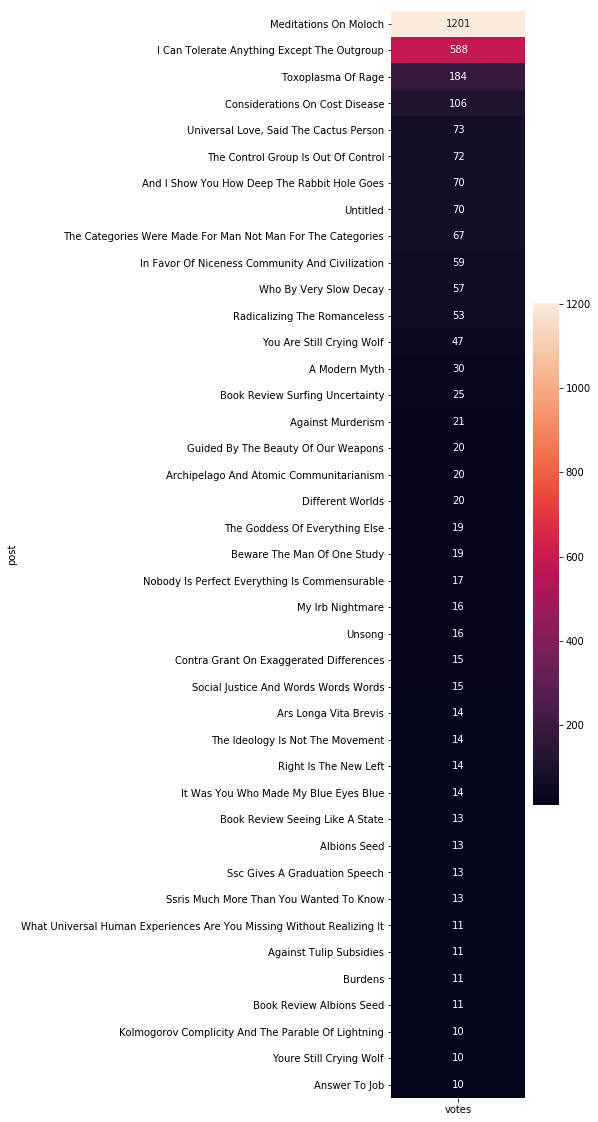

In [13]:
top_blogs = []

for blog, votes in zip(data['Favoritepost'].value_counts().index[1:],
                        data['Favoritepost'].value_counts()[1:]):
    if votes < 10:
        break
    top_blogs.append([blog.title(), votes])
    
top_blogs = pd.DataFrame(top_blogs, columns=['post', 'votes'])
top_blogs = top_blogs.set_index('post')

plt.figure(figsize=(3,len(top_blogs)//2))
sns.heatmap(top_blogs, annot=True, fmt='g')

In [14]:
posts = []

for i in post_dummies.columns:
    corr = pearsonr(data['PoliticalSpectrum'].fillna(data['PoliticalSpectrum'].median()), post_dummies[i])
    posts.append([i, corr[0], corr[1]])

posts = pd.DataFrame(posts, columns=['post', 'corr', 'pvalue'])

# SSC Posts Liberals Like

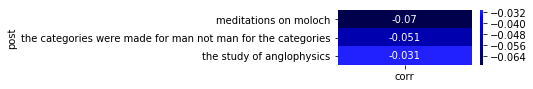

In [15]:
ssc_lib = posts[(posts['pvalue'] < .01)  & (posts['corr'] < 0)].sort_values('corr').head(20)[['post', 'corr']]
ssc_lib = ssc_lib.set_index('post')

corrmap(ssc_lib)

# SSC Posts Conservatives Like

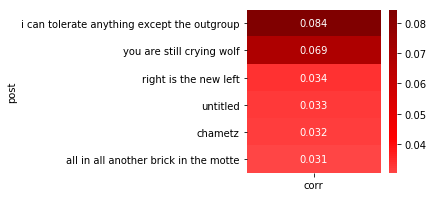

In [16]:
ssc_con = posts[(posts['pvalue'] < .01) & (posts['corr'] > 0)].sort_values('corr', ascending=False).head(20)[['post', 'corr']]
ssc_con = ssc_con.set_index('post')

corrmap(ssc_con)

# SSC Posts Smart People Like

In [17]:
data['IQ'] = pd.to_numeric(data['IQ'], errors='coerce')

posts = []

for i in post_dummies.columns:
    corr = pearsonr(data['IQ'].fillna(data['IQ'].median()), post_dummies[i])
    posts.append([i, corr[0], corr[1]])

posts = pd.DataFrame(posts, columns=['post', 'corr', 'pvalue'])

posts[posts.pvalue < .05].sort_values('corr', ascending=False).head(20)[['post', 'corr']]

,post,corr
106,meditations on moloch,0.02769


# SSC Posts Conscientious People Like

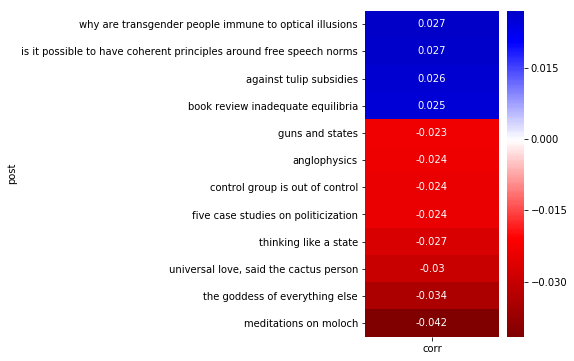

In [18]:
data['BigFiveC'] = pd.to_numeric(data['BigFiveC'], errors='coerce')

posts = []

for i in post_dummies.columns:
    corr = pearsonr(data['BigFiveC'].fillna(data['BigFiveC'].median()), post_dummies[i])
    posts.append([i, corr[0], corr[1]])

posts = pd.DataFrame(posts, columns=['post', 'corr', 'pvalue'])

ssc_consc = posts[posts.pvalue < .05].sort_values('corr', ascending=False).head(20)[['post', 'corr']]
ssc_consc = ssc_consc.set_index('post')

corrmap(ssc_consc, reverse=True)

# SSC Posts Open People Like

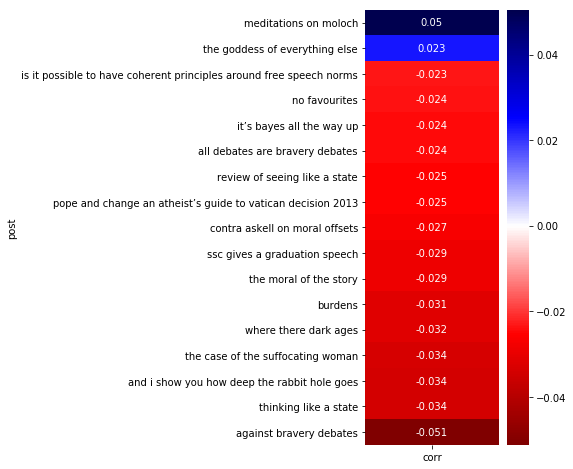

In [19]:
data['BigFiveO'] = pd.to_numeric(data['BigFiveO'], errors='coerce')

posts = []

for i in post_dummies.columns:
    corr = pearsonr(data['BigFiveO'].fillna(data['BigFiveO'].median()), post_dummies[i])
    posts.append([i, corr[0], corr[1]])

posts = pd.DataFrame(posts, columns=['post', 'corr', 'pvalue'])

ssc_open = posts[posts.pvalue < .05].sort_values('corr', ascending=False).head(20)[['post', 'corr']]
ssc_open = ssc_open.set_index('post')

corrmap(ssc_open, reverse=True)

# SSC Posts Agreeable People Like

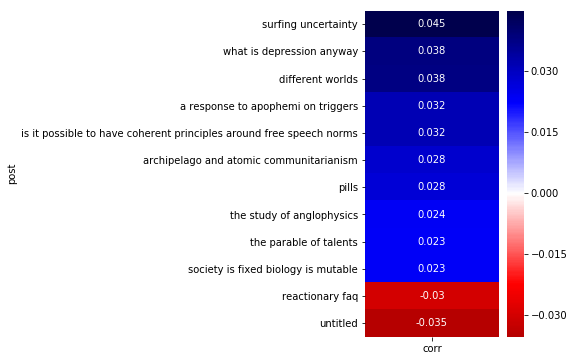

In [20]:
data['BigFiveA'] = pd.to_numeric(data['BigFiveA'], errors='coerce')

posts = []

for i in post_dummies.columns:
    corr = pearsonr(data['BigFiveA'].fillna(data['BigFiveA'].median()), post_dummies[i])
    posts.append([i, corr[0], corr[1]])

posts = pd.DataFrame(posts, columns=['post', 'corr', 'pvalue'])

ssc_ag = posts[posts.pvalue < .05].sort_values('corr', ascending=False).head(20)[['post', 'corr']]
ssc_ag = ssc_ag.set_index('post')

corrmap(ssc_ag, reverse=True)

# SSC Posts Neurotic People Like

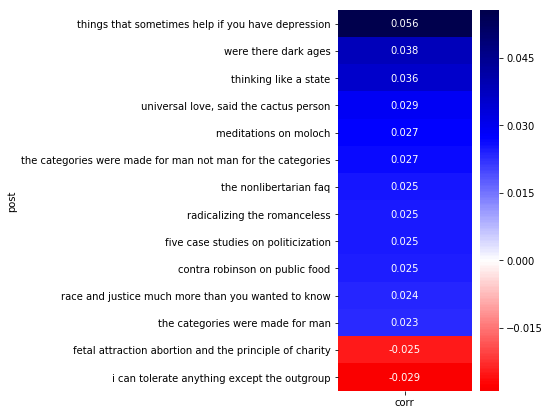

In [21]:
data['BigFiveN'] = pd.to_numeric(data['BigFiveN'], errors='coerce')

# Reverse the scale, changing emotional stability back to neuroticism
data['BigFiveN'] = data['BigFiveN'].max() - data['BigFiveN']

posts = []

for i in post_dummies.columns:
    corr = pearsonr(data['BigFiveN'].fillna(data['BigFiveN'].median()), post_dummies[i])
    posts.append([i, corr[0], corr[1]])

posts = pd.DataFrame(posts, columns=['post', 'corr', 'pvalue'])

ssc_n = posts[posts.pvalue < .05].sort_values('corr', ascending=False).head(20)[['post', 'corr']]
ssc_n = ssc_n.set_index('post')

corrmap(ssc_n, reverse=True)